knn uses k closest points (nearest neighnours) for performing classification.
k is number of objects to compare to for a particular dataset
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

## Meghna Lohani 16BCE1395 

## Lab 7 knn


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import operator

k is usually an odd number 
for multiclass k can be 6
for data containing documents, it has to be converted to frequency
knn classifiers are called lazy learners since they do not build models explicitly
can produce arbitary shaped boundaries


In [4]:
data=pd.read_csv('iris.csv',header=None)
columns=['SepalLength','Sepalwidth','PetalLength','PetalWidth','Name']
data.columns=columns

In [5]:
data.head()

,SepalLength,Sepalwidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#A function to calculate Euclidean distance  between a pair of points 
def Edistance(data1,data2,length):
    distance=0
    for i in range (l):
        distance+=np.square(data1[i]-data2[i])
    return np.sqrt(distance)

In [7]:
#Testing
d1=[1,2,3,4]
d2=[1,2,3,1]
l=4
print (Edistance(d1,d2,l))

3.0


In [11]:
#This function returns the predicted class and k nearest neighbours 
def knn(traindata,testinstance,k):
    distance={}
    sort={}
    length=testinstance.shape[1]
    print(length)
    for i in range(len(traindata)):
        dis=Edistance(testinstance,traindata.iloc[i],length)
        distance[i]=dis[0]
    #print("Distance of each point from test dataset")
    #print(distance)
    sorted_dist=sorted(distance.items(), key=operator.itemgetter(1)) 
    #print("Sorted distance array")
    #print(sorted_dist)
    neighbours=[]
    for i in range(k):
        neighbours.append(sorted_dist[i][0])
    mostFreq={}
    for x in range(len(neighbours)):
       
        resp = traindata.iloc[neighbours[x]][-1]
        #last index that is name 
        #we find the name which is occuring most number of times
 
        if resp in mostFreq:
            mostFreq[resp] += 1
        else:
            mostFreq[resp] = 1
    sorted_mostFreq= sorted(mostFreq.items(), key=operator.itemgetter(1), reverse=True)
    return(sorted_mostFreq[0][0], neighbours)

In [12]:
testSet = [[4.8,3.0,1.4,0.1]]
test = pd.DataFrame(testSet)

In [13]:
k = 1
result,neigh = knn(data, test, k)
#1 neighbour

4


In [14]:
print(result)

Iris-setosa


In [15]:
print(neigh)

[12]


In [16]:
k = 3
result,neigh = knn(data, test, k)
print(result)
print(neigh)

4
Iris-setosa
[12, 1, 9]


In [73]:
k = 5
result,neigh = knn(data, test, k)
print(result)
print(neigh)

Iris-setosa
[12, 1, 9, 34, 37]


In [38]:
#Splitting the data into training and testing set 
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:4]
y=data.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
data2=pd.DataFrame(x_train)
data2['Name']=y_train
data2.head()

,SepalLength,Sepalwidth,PetalLength,PetalWidth,Name
60,5.0,2.0,3.5,1.0,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica


In [39]:
from sklearn.metrics import accuracy_score

In [42]:
print(x_test)

     SepalLength  Sepalwidth  PetalLength  PetalWidth
114          5.8         2.8          5.1         2.4
62           6.0         2.2          4.0         1.0
33           5.5         4.2          1.4         0.2
107          7.3         2.9          6.3         1.8
7            5.0         3.4          1.5         0.2
100          6.3         3.3          6.0         2.5
40           5.0         3.5          1.3         0.3
86           6.7         3.1          4.7         1.5
76           6.8         2.8          4.8         1.4
71           6.1         2.8          4.0         1.3
134          6.1         2.6          5.6         1.4
51           6.4         3.2          4.5         1.5
73           6.1         2.8          4.7         1.2
54           6.5         2.8          4.6         1.5
63           6.1         2.9          4.7         1.4
37           4.9         3.1          1.5         0.1
78           6.0         2.9          4.5         1.5
90           5.5         2.6

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


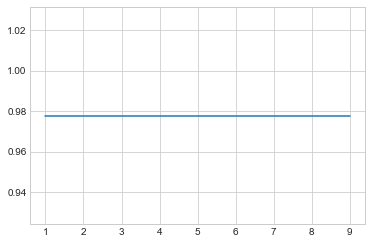

In [66]:
#We calculate accuracy score for all the instances in test data and plot it
#No of neighbors varies from 1 to 10
neighb=[]
accscore=[]
test=pd.DataFrame(x_test)
for i in range(1,10,1):
    neighb.append(i)
    y_pred=[]
    #print(len(x_test))
    for j in range(0,len(test)):
        test_inst=test.iloc[[j]]
        #print(test_inst)
        testing=list(test_inst.values)
        testing2=pd.DataFrame(testing)
        #print(testing2)
        result,neigh=knn(data2,testing2,i)
        y_pred.append(result)
    acc=accuracy_score(y_test,y_pred)
    y_pred=[]
    accscore.append(acc)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(neighb,accscore)       
        

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
def Kneigh(num):
    neigh=KNeighborsClassifier(n_neighbors=num)
    neigh.fit(x_train,y_train)
    y_pred=neigh.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    return acc_score
    

In [30]:
#Now, we will find accuracy for different number of neighbours 
accy=[]
neix=[]
for i in range(1,10,1):
    neix.append(i)
    accy.append(Kneigh(i))
print(accy)
print(neix)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


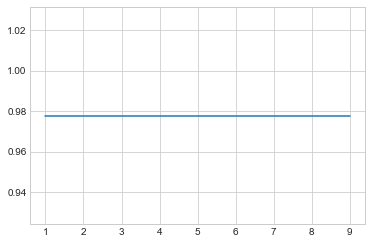

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(neix,accy)